In [ ]:
import tensorflow
import sklearn
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size = 0.2,random_state = 177013)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_trans = scaler.fit_transform(x_train)
x_test_trans = scaler.transform(x_test)
n,d = x_train.shape

In [ ]:
import tensorflow
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import Model,Sequential

sequential way 

In [ ]:
model_1 = Sequential()
model_1.add(Dense(100, activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(50,activation="relu"))
model_1.add(Dense(1,activation="sigmoid"))

In [ ]:
model_1.compile(optimizer = "adam",loss = "binary_crossentropy",metrics=["accuracy"])

In [ ]:
history_1 = model_1.fit(x_train_trans,y_train, validation_data = (x_test_trans, y_test), epochs = 10)

Epoch 1/10
15/15 [==============================] - 1s 15ms/step - loss: 0.6621 - accuracy: 0.6380 - val_loss: 0.2770 - val_accuracy: 0.9474
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.2981 - accuracy: 0.9168 - val_loss: 0.1415 - val_accuracy: 0.9825
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1765 - accuracy: 0.9433 - val_loss: 0.0973 - val_accuracy: 0.9825
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1314 - accuracy: 0.9612 - val_loss: 0.0797 - val_accuracy: 0.9825
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1192 - accuracy: 0.9584 - val_loss: 0.0711 - val_accuracy: 0.9825
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0830 - accuracy: 0.9804 - val_loss: 0.0616 - val_accuracy: 0.9825
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0795 - accuracy: 0.9767 - val_loss: 0.0567 - val_accuracy: 0.9825
Epoch 8/10
15/15 [=

Functional WAY 

In [ ]:
i = Input(shape=(x_train[0].shape))
x = Dense(100,activation="relu")(i)
x = Dense(50,activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(1,activation="sigmoid")(x)


model_2 = Model(i,x)
model_2.compile(optimizer = "adam",loss = "binary_crossentropy",metrics=["accuracy"])
tensorflow.keras.utils.plot_model(model_2)
history_2 = model_2.fit(x_train_trans,y_train, batch_size =48,validation_data=(x_test_trans,y_test), epochs = 10)

Epoch 1/10
10/10 [==============================] - 1s 20ms/step - loss: 0.6683 - accuracy: 0.5742 - val_loss: 0.2914 - val_accuracy: 0.9737
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 0.2725 - accuracy: 0.9508 - val_loss: 0.1448 - val_accuracy: 0.9737
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1685 - accuracy: 0.9471 - val_loss: 0.0970 - val_accuracy: 0.9649
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1171 - accuracy: 0.9673 - val_loss: 0.0791 - val_accuracy: 0.9737
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1005 - accuracy: 0.9678 - val_loss: 0.0724 - val_accuracy: 0.9737
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0848 - accuracy: 0.9798 - val_loss: 0.0698 - val_accuracy: 0.9737
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0820 - accuracy: 0.9830 - val_loss: 0.0696 - val_accuracy: 0.9825
Epoch 8/10
10/10 [=

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y = history_1.history['loss'], x = [*range(len(history_1.history['loss']))],name = "model_1_train loss",mode = "lines+markers"))
fig.add_trace(go.Scatter(y = history_1.history['val_loss'], x = [*range(len(history_1.history['val_loss']))],name = "model_1_test loss",mode = "lines+markers"))
fig.add_trace(go.Scatter(y = history_2.history['loss'], x = [*range(len(history_2.history['loss']))],name = "model_2_train loss",mode = "lines+markers"))
fig.add_trace(go.Scatter(y = history_2.history['val_loss'], x = [*range(len(history_2.history['val_loss']))],name = "model_2_test loss",mode = "lines+markers"))
fig.update_xaxes(title = "epochs")
fig.update_yaxes(title = "loss")
fig.update_layout(title = "train VS test loss")

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y = history_1.history['accuracy'], x = [*range(len(history_1.history['accuracy']))],name = "model_1_train_accuracy" ,mode = "lines+markers"))
fig.add_trace(go.Scatter(y = history_1.history['val_accuracy'], x = [*range(len(history_1.history['val_accuracy']))],name = "modle_1_test_accuracy" ,mode = "lines+markers"))
fig.add_trace(go.Scatter(y = history_2.history['accuracy'], x = [*range(len(history_2.history['accuracy']))],name = "model_2_train_accuracy" ,mode = "lines+markers"))
fig.add_trace(go.Scatter(y = history_2.history['val_accuracy'], x = [*range(len(history_2.history['val_accuracy']))],name = "model_2_test_accuracy" ,mode = "lines+markers"))
fig.update_xaxes(title = "epochs")
fig.update_yaxes(title = "accuracy")
fig.update_layout(title = "train vs test accuracy",)

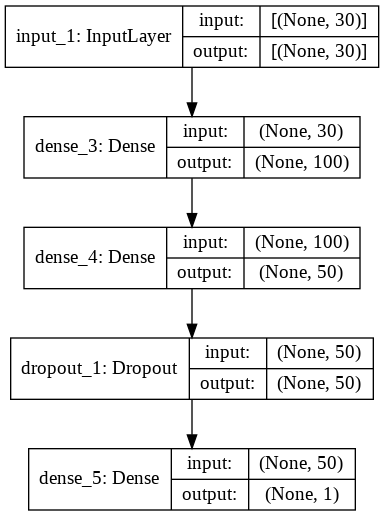

In [ ]:
tensorflow.keras.utils.plot_model(model_2,expand_nested = True, show_shapes=True)

In [ ]:
x_train

array([[1.602e+01, 2.324e+01, 1.027e+02, ..., 9.975e-02, 2.948e-01,
        8.452e-02],
       [1.476e+01, 1.474e+01, 9.487e+01, ..., 1.251e-01, 3.109e-01,
        8.187e-02],
       [1.278e+01, 1.649e+01, 8.137e+01, ..., 5.882e-02, 2.383e-01,
        6.410e-02],
       ...,
       [1.611e+01, 1.805e+01, 1.051e+02, ..., 1.216e-01, 2.792e-01,
        8.158e-02],
       [1.808e+01, 2.184e+01, 1.174e+02, ..., 9.181e-02, 2.369e-01,
        6.558e-02],
       [1.865e+01, 1.760e+01, 1.237e+02, ..., 2.378e-01, 3.799e-01,
        9.185e-02]])